# Gradient Vanishing

## 1. Chain Rule에 의한 $\frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}}$의 계산

- Deep Neural Network에 포함된 모든 $w_{i,j}^{(l)}$가 $Loss$에 미치는 영향 $\frac{\partial Loss(W)}{\partial w_{i,j}^{(l)} }$ 구하기<br>
$ \ \ $ $\checkmark \ $ 우리가 찾는 $w_{i,j}^{(l)}$는 $Loss(W)$를 최소화하는 $w_{i,j}^{(l)}$를 찾아야함 <br>


- $Loss(W)$는 $w_{i,j}^{(l)}$의 합성함수임<br>
$ \ \ $ $\checkmark \ $ $w_{i,j}^{(l)}$는 여러 번의 선형변환과 비선형 변환을 거쳐 $Loss(W)$값에 도달함

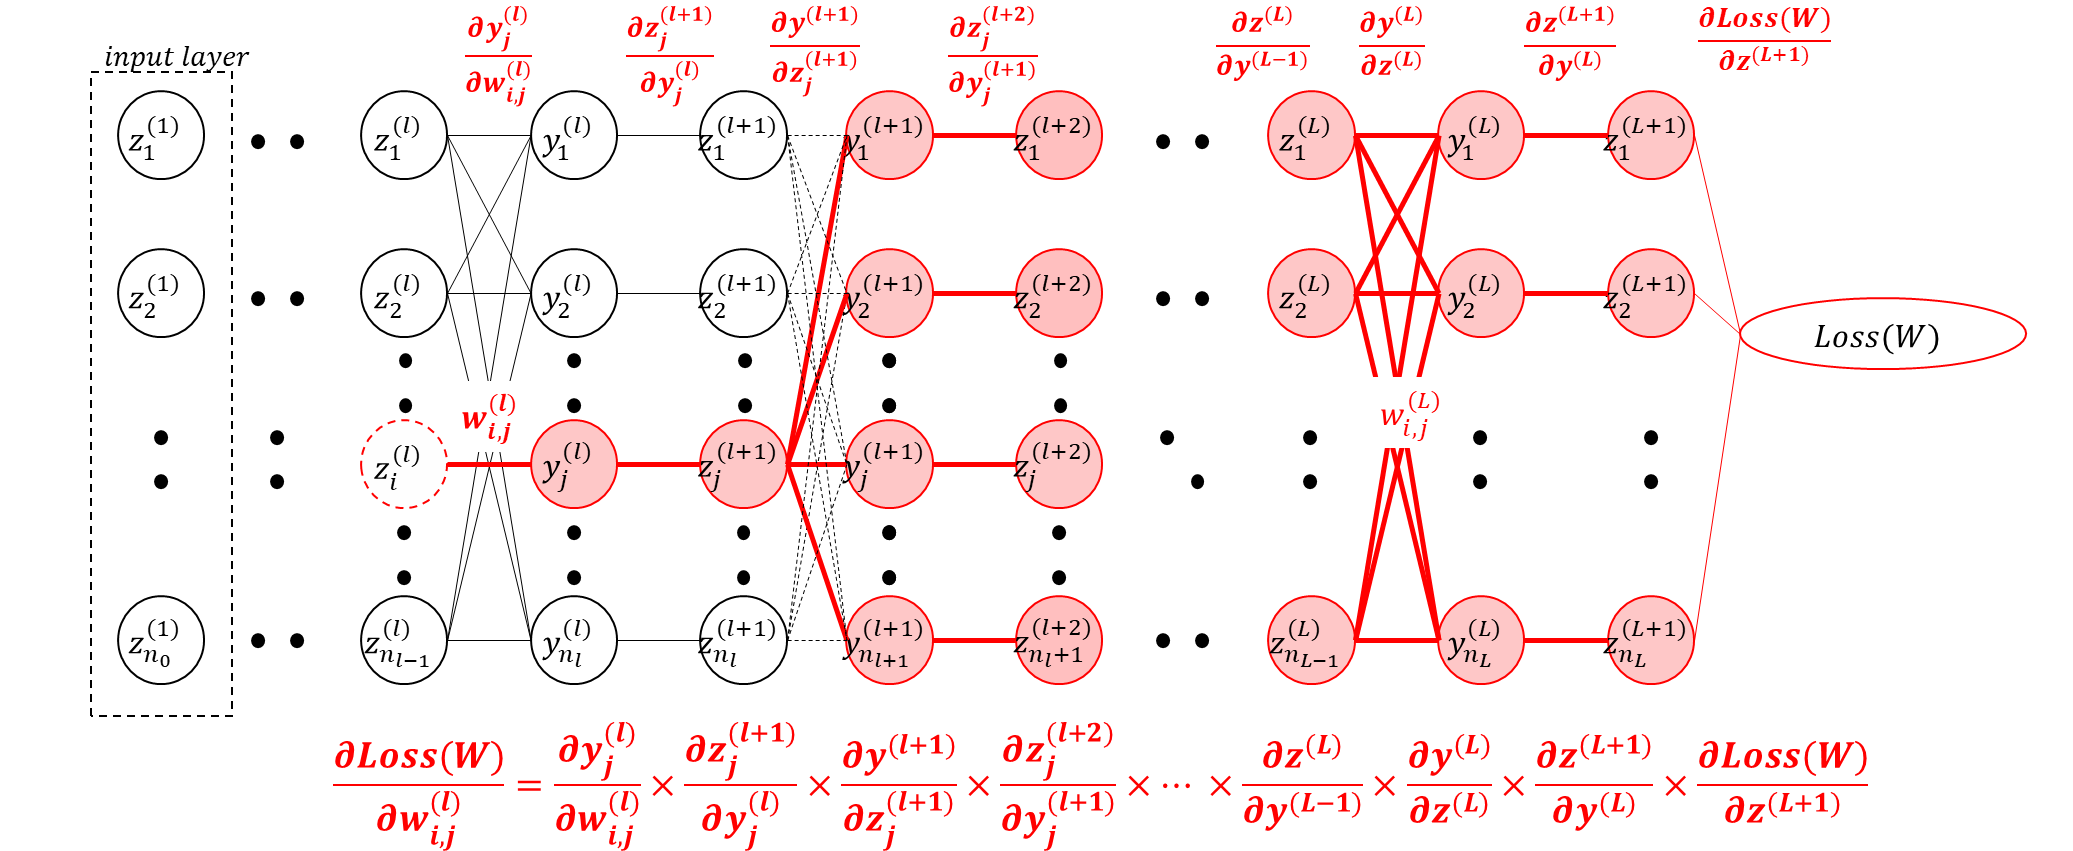

- Parameter $ w_{i,j}^{(l)}$가 $Loss(W)$에 미치는 영향을 파악하는 것은 매우 중요 <br>
$ \ \ $ $\checkmark \ $ 왜냐하면 우리의 문제는 다음 식을 만족하는 $ w_{i,j}^{(l)}$ 찾는 것임 <br>

<span style="color:blue">
$$
\underset{W} {minimize} \ \ Loss(W)
$$
</span> <br>

- 우리가 구하는  $ w_{i,j}^{(l)*}$는  $\frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}  } = 0$를 만족하는 $ w_{i,j}^{(l)*}$임<br>
$ \ \ $ $\checkmark \ $$\frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}  } = 0$를 만족하는 찾기 위해 $ w_{i,j}^{(l)*}$를 찾기 위해 $Gradient  \ \ Descent$를 사용함

$$
w_{i,j}^{(l)} = w_{i,j}^{(l)} - \rho  \underbrace{ \left( \frac{\partial Loss(w)}{\partial w_{i,j}^{(l)}  } \right) } _{Chain \ Rule을 \ 활용해서 \ 구함}
$$
<br>
- 하지만  $ w_{i,j}^{(l)}$는 여러  Hidden  Layer를 거쳐가며 다음의 선형변환과 비선형변환을 반복 계산하는 과정을 거치는 합성함수의 미분임

### 1.1 선형변환

- $l^{th}$ Hidden Layer에서의 선형변환

$$
 y^{(l)} =  W^{(l)} \cdot   z^{(l)} + \varepsilon^{(l)}
$$

$\qquad$ 구분 | $\qquad$ 수학식 표현 
:----|:----
<br> $l^{th}$ Hidden  Layer의  선형변환 | <br> $ y^{(l)} = W^{(l)} \cdot z^{(l)}+ \varepsilon^{(l)} $
<br> $l^{th}$  Hidden  Layer의 선형변환  결과 | <br> $ y^{(l)} = \left( y_{1}^{(l)}, \cdots, y_{n_l}^{(l)}  \right) $
<br> $l^{th}$ Hidden Layer의 선형변환 Matrix | <br> $ W^{(l)} = \left(  w_1^{(l)}, w_2^{(l)}, \cdots  w_{n_l}^{(l)}  \right) $
<br> 선형변환  된 $j^{th}$ node | <br> $ y_{i}^{(l)} = w_{i}^{(l)} \cdot z^{(l)} $
<br> $j^{th}$ node로 선형변환하기 위해 사용한 <br> parameter들 | <br> $$ w_{i}^{(l)} = \left( w_{1,i}^{(l)} w_{2,i}^{(l)}, \cdots, w_{n_{l-1},i}^{(l)}  \right), i=1, \cdots , n_l $$

- 선형변환과 관련한 미분

$$
\begin{align}
\frac{\partial y^{(l)}}{\partial W^{(l)}} =& \frac{ \left( \partial W^{(l)}z^{(l)} \right) }{\partial W^{(l)}} = z^{(l)} \\\\
\frac{\partial y^{(l)}}{\partial z^{(l)}} =& \frac{ \left(\partial W^{(l)}z^{(l)}\right) }{\partial z^{(l)}} = W^{(l)}
\end{align}
$$  

### 1.2 비선형변환:  Activation Function

- Activation function을 이용한 비선형 변환<br>

$$
z_{i}^{(l+1)} = \sigma \left( y_{i}^{(l)} \right)
$$<br><br>

- 비선형변환이 다음 단계에 미치는 영향<br>

$$
\frac{\partial z^{(l+1)}}{\partial y^{(l)}} = \frac{\partial \sigma \left( y_{i}^{(l)} \right)}{\partial y^{(l)}}
$$

활성함수 |  $\qquad$ 활성함수 |  $\qquad \qquad$ 미분함수
:----:|:----|:----
ReLU |   $$\begin{align} z^{(l+1)} =& ReLU \left( y^{(l)} \right) \\  =& \begin{cases} y^{(l)}, & if \ y^{(l)} \ge 0  \\\\ 0, & \ if \ y^{(l)}<0  \end{cases} \end{align}$$ |  $$\begin{align} \frac{\partial z^{(l+1)}}{\partial y^{(l)} } =& \frac{ \partial ReLU \left( y^{(l)} \right) }{ \partial  \left( y^{(l)} \right) } \\ =& \begin{cases} 1, & if \ y^{(l)} \ge 0  \\\\ 0, & \ if \ y^{(l)}<0  \end{cases} \end{align}$$
Sigmoid |  $$\begin{align}  z^{(l+1)} =& Sigmoid \left( y^{(l)} \right) \\ =& \frac{1}{1+ exp \left( -y^{(l)} \right)} \end{align}$$ |  $$\begin{align} \frac{\partial z^{(l+1)}}{\partial y^{(l)} } =& \frac{ \partial Sigmoid \left( y^{(l)} \right) }{ \partial  \left( y^{(l)} \right) } \\ =& z^{(l+1)} \left( 1 - z^{(l+1)} \right)\end{align} $$
Hyperbolic Tangent <br> (tanh) |  $$\begin{align}  z^{(l+1)} =& tanh \left( y^{(l)} \right)\\  =& \frac{e^{y^{(l)}}- e^{-y^{(l)}}}{e^{y^{(l)}}- e^{-y^{(l)}}} \end{align}$$ |  $$\begin{align} \frac{\partial z^{(l+1)}}{\partial y^{(l)} } =& \frac{ \partial tanh \left( y^{(l)} \right) }{ \partial  \left( y^{(l)} \right) } \\ =& \left( 1 - z^{(l+1)} \right) \left( 1 + z^{(l+1)} \right) \end{align}$$
Softmax | $$\begin{align}  z_k^{(L+1)} =& Softmax \left( y_k^{(L)} \right) \\ =& \frac{exp \left( y_k^{(L)} \right)}{\sum_{i=1}^{C} y_i^{(L)}}  \end{align}$$ | $$\begin{align} \frac{\partial z_k^{(L+1)}}{\partial y_i^{(L)} } =& \frac{ \partial Softmax \left( z_k^{(L+1)} \right) }{ \partial  \left( y_i^{(L)} \right) } \\ =& \begin{cases}  z_k^{(L+1)} \left( 1 - z_k^{(L+1)} \right), & if \ k=i  \\\\ - z_k^{(L+1)} z_i^{(L+1)}, & \ if \ k \neq i  \end{cases} \end{align}$$

$\qquad \quad $ $\Longrightarrow \ $ 우리가 사용하는 비선형변환을 위해 사용하는 Activation Function은 다음과 같은 특징을 가지고 있음<br>

$\qquad \qquad $ (i) 매우 <span style="color:red">간단한 비선형 변환</span>임<br>
$\qquad \qquad $ (ii) Activation Function을 $y_j^{(l)}$로 <span style="color:red">미분한 결과도 매우 쉽게 구할 수 있는 값</span>임  

###  1.3 Chain Rule에 의한 $w_{i,j}^{(l)}$이  $Loss(W)$에 미치는 영향
#### (1) Chain Rule을 이용하여  $\frac {\partial Loss(W)}{\partial w_{i,j}^{(l)}}$ 구하기

- Deep Neural Network의 구조를 상기하면 $w_{i,j}^{(l)}$는 여러 선형변환과 비선형변환을 거쳐 $Loss$에 영향을 미침<br>
$ \ \ $ $\checkmark \ $ 즉, $ \frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}  } $은 합성함수의 미분임<br>
$ \ \ $ $\checkmark \ $ $ \frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}  } $은 한번에 구할 수 없고 $w_{i,j}^{(l)}$이 여러 함수변환 단계를 고려하여 $ \frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}  } $를 구해야함

$$
\begin{align}
     \frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}  } 
   =& \frac{\partial y_j^{(l)}        }{\partial w_{i,j}^{(l)}  }    \times 
     \frac{\partial z_{j}^{(l+1)}    }{\partial y_j^{(l)}     }    \times 
     \frac{\partial y^{(l+1)}        }{\partial z_j^{(l+1)}     }    \times  
     \frac{\partial z^{(l+2)}        }{\partial y^{(l+1)}     }    \times 
     \frac{\partial y^{(l+3)}        }{\partial z^{(l+2)}     }    \times  \cdots \times
     \frac{\partial y^{(L)}          }{\partial z^{(L)}       }    \times  
     \frac{\partial z^{(L+1)}        }{\partial y^{(L)}       }    \times 
     \frac{\partial Loss(W)}{\partial z^{(L+1)}     }   \\\\
\Longrightarrow& \ \ \frac{ \partial y_{j}^{(l)}}{\partial w_{ij}^{(l)} } \times
   \underbrace{ \left[
                   \frac{ \partial y^{(l+1)}}{\partial z_{j}^{(l+1)} } \times 
                    \frac{ \partial y^{(l+2)}}{\partial z_{j}^{(l+2)} } \times \cdots \times 
                    \frac{ \partial y^{(L)}}{\partial z^{(L)} }
                \right]}_{선형변환 \ Term들} \times
   \underbrace{ \left[ \frac{ \partial z_{j}^{(l+1)}}{ \partial y_{j}^{(l)} } \times
                   \frac{ \partial z^{(l+2)}}{ \partial y^{(l+1)} }  \times \cdots \times 
                   \frac{ \partial z^{(L+1)}}{ \partial y^{(L)} }
                \right]}_{비선형변환 \ Term들}
                \frac{ \partial Loss(W)}{ \partial z^{(L+1)} } 
\end{align}
$$

#### (2)  $Sigmoid$ activation function과  $Softmax$를 사용한 Chain Rule의 결과

- Activation function으로 Sigmoid function을 사용했다고하면

$$
\begin{align}
z_j^{(l+1)} =& \sigma^{(l)} \left( y_j^{(l)} \right) =  \frac{1}{1+ exp \left( -y_j^{(l)} \right)} 
\end{align}
$$

- Sigmoid function의 미분계수

$$
\begin{align}
\frac{\partial z_j^{(l+1)}}{\partial y_{j}^{(l)}  } =& z_{j}^{(l+1)} \left( 1 - z_{j}^{(l+1)} \right)
\end{align}
$$

- Chain Rule을 이용한 $ \frac{\partial \mathcal{Loss}(W)}{\partial w_{ij}^{(l)}  }$ 계산

$$
\begin{align} 
     \frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}  } 
   =& \ \ \frac{\partial y_j^{(l)}        }{\partial w_{i,j}^{(l)}  }    \times 
      \frac{\partial z_{j}^{(l+1)}    }{\partial y_j^{(l)}     }    \times 
      \frac{\partial y^{(l+1)}        }{\partial z_j^{(l+1)}     }    \times  
      \frac{\partial z^{(l+2)}        }{\partial y^{(l+1)}     }    \times 
      \frac{\partial y^{(l+2)}        }{\partial z^{(l+2)}     }    \times  \cdots \times
      \frac{\partial y^{(L)}          }{\partial z^{(L)}       }    \times  
      \frac{\partial z^{(L+1)}        }{\partial y^{(L)}       }    \times 
      \frac{\partial Loss(W)}{\partial z^{(L+1)}     }       \\
   =& \ \  z_i^{(l)}    
      z_{j}^{(l+1)} \left( 1 - z_{j}^{(l+1)} \right)     \
      W_j^{(l+1)}                                           
      z_{j}^{(l+2)} \left( 1 - z_{j}^{(l+2)} \right)    
      W^{(l+2)}\times \cdots \times 
      W^{(L)}                                             
      z_{i}^{(L+1)} \left( 1 - z_{i}^{(L+1)} \right)     
      \frac{\partial Loss(W)}{\partial z^{(L+1)}     }  \\
   \Longrightarrow& \ \  \ \  z_i^{(l)}  
   \left[
      z_{j}^{(l+1)} \left( 1 - z_{j}^{(l+1)} \right) z^{(l+2)} \left( 1 - z^{(l+2)} \right)
      \times \cdots \times z^{(L+1)} \left( 1 - z^{(L+1)} \right) \right]   \\
    & \ \  \times \left[ W^{(l+1)} W^{(l+2)} \times \cdots \times W^{(L)} 
       \right] \times \frac{\partial Loss(W)}{\partial z^{(L+1)}     }
\end{align}
$$

## 2. Gradient Vanishing

### 2.1  $\frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}  }$의 계산값의 특징

#### (1)  $\frac{\partial Loss(W)}{\partial w_{ij}^{(l)}  }$의 구성

- Sigmoid activation function을 사용한 경우, $\frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}  }$의 구성을 보면 다음과 같은 4가지 유형의 항들이 곱해진 형태임을 확인할 수 있음
$$
\begin{align}
     \frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}  } 
   = & \frac{\partial y_j^{(l)}        }{\partial w_{i,j}^{(l)}  }    \times 
       \frac{\partial z_{j}^{(l+1)}    }{\partial y_j^{(l)}     }    \times 
       \frac{\partial y^{(l+1)}        }{\partial z_j^{(l+1)}     }    \times  
       \frac{\partial z^{(l+2)}        }{\partial y^{(l+1)}     }    \times 
       \frac{\partial y^{(l+2)}        }{\partial z^{(l+2)}     }    \times  \cdots \times
       \frac{\partial y^{(L)}          }{\partial z^{(L)}       }    \times  
       \frac{\partial z^{(L+1)}        }{\partial y^{(L)}       }    \times 
       \frac{\partial Loss(W)}{\partial z^{(L+1)}     }       \\\\
   \Longrightarrow&   \ \ z_i^{(l)}  \\
   & \times \ 
     \left[
        z_{j}^{(l+1)} \left( 1 - z_{j}^{(l+1)} \right) z^{(l+2)} \left( 1 - z^{(l+2)} \right)
        \times \cdots \times z^{(L+1)} \left( 1 - z^{(L+1)} \right)
        \right] \quad (선형변환 \ Term들)   \\
   & \times \ 
     \left[
        W_j^{(l+1)} W^{(l+2)} \times \cdots \times W^{(L)} 
        \right] \quad (비선형변환 \ Term들) \\
   & \times  \ 
        \frac{\partial Loss(W)}{\partial z^{(L+1)}     }
\end{align}
$$

#### (2)  $w_{i,j}^{(l)}$가  $y_{j}^{(l)} $ 에 미치는 영향: $ \frac{\partial y_{j}^{(l)} }{\partial w_{i,j}^{(l)}}$
- $y_j^{(l)}=w_{0j}^{(l)} + w_{1j}^{(l)} z_{1}^{(l)} + \cdots +  w_{ij}^{(l)} z_{j}^{(l)} + \cdots+ w_{n_{l-1}, j}^{(l)} z_{n_{l-1}}^{(l)} + \varepsilon_j$<br>


- $ \frac{\partial y_{j}^{(l)} }{\partial w_{i,j}^{(l)}} = z_{j}^{(l)} $

#### (3)  $z^{(l)}$ 이  $y^{(l)}$에 미치는 영향: $\frac{\partial y^{(l)}}{\partial z^{(l)}}$

- $y^{(l)} = W^{(l)}z^{(l)}$


- $\frac{\partial y^{(l)}        }{\partial z^{(l)}     } =  W^{(l)}$ 


- 즉,  $\frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}  }$ 계산에  $W^{(l)}, l=1, \cdots, L$들이 곱해지면서 나타남

#### (4)  $y^{(l)}$ 이 Activation function을 적용한 결과인 $z^{(l+1)}$에  미치는 영향: $\frac{\partial z^{(l+1)}        }{\partial y^{(l)}     }$  <br>
- Activation function이 SIgmoid function인경우,  $\frac{\partial Loss(W)}{\partial w_{ij}^{(l)}  }$ 계산에는  각 Hidden layer에서 적용한 activation function들의 변화율  $\frac{\partial z^{(l+1)}        }{\partial y^{(l)}     }$들이 곱해지면서 나타남 <br>
$$
\begin{align}
     \frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}  } 
   \Longrightarrow&   \ \  \ \ z_i^{(l)}  \\
   \times & \ 
     \left[
        z_{j}^{(l+1)} \left( 1 - z_{j}^{(l+1)} \right) z^{(l+2)} \left( 1 - z^{(l+2)} \right)
        \times \cdots \times z^{(L+1)} \left( 1 - z^{(L+1)} \right)
        \right]  \\
   \times & \ 
     \left[
        W_j^{(l+1)} W^{(l+2)} \times \cdots \times W^{(L)} 
        \right]  \\
   \times & \ 
        \frac{\partial Loss(W)}{\partial z^{(L+1)}     }
\end{align}
$$

#### (5)  기타: 마지막 Activation function적용결과가   $Loss(W)$에 미치는 영향: $\frac{\partial Loss(W)}{\partial z^{(L+1)}     }$ 
- 마지막 activation function이 Softmax()라면 중간에 위치한 activation function이 다음 단계에 미치는 영향과 다른 형태여서 따로 구분함
- $\frac{\partial Loss(W)}{\partial z^{(L+1)}     }$  

### 2.2  모든 비선형변환에 대해  $\left| \frac{\partial z^{(l+1)}        }{\partial y^{(l)}     } \right| < 1$인 경우
$$
\begin{align}
     \frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}  } 
   = & \frac{\partial y_j^{(l)}        }{\partial w_{i,j}^{(l)}  }    \times  
       \frac{\partial z_{j}^{(l+1)}    }{\partial y_j^{(l)}     }    \times 
       \frac{\partial y^{(l+1)}        }{\partial z_j^{(l+1)}     }  \times  
       \frac{\partial z^{(l+2)}        }{\partial y^{(l+1)}     }    \times 
       \frac{\partial y^{(l+2)}        }{\partial z^{(l+2)}     }    \times  \cdots \times
       \frac{\partial y^{(L)}          }{\partial z^{(L)}       }    \times  
       \frac{\partial z^{(L+1)}        }{\partial y^{(L)}       }    \times 
       \frac{\partial Loss(W)}{\partial z^{(L+1)}     }       \\
    \Longrightarrow&   \ \  \ z_i^{(l)}  \\
    \times & \ 
     \left[
        z_{j}^{(l+1)} \left( 1 - z_{j}^{(l+1)} \right) z^{(l+2)} \left( 1 - z^{(l+2)} \right)
        \times \cdots \times z^{(L+1)} \left( 1 - z^{(L+1)} \right)
        \right]  \\
    \times & \ 
     \left[
        W_j^{(l+1)} W^{(l+2)} \times \cdots \times W^{(L)} 
        \right]  \\
    \times &  \  
        \frac{\partial Loss(W)}{\partial z^{(L+1)}     }
\end{align}
$$

- $L$개의 Hidden Layer가 있는 Neural Network을 다루고 있다면 $\frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}  }$ 계산에 activation function들의 변화율  $\frac{\partial z^{(l+1)}        }{\partial y^{(l)}     }$들이 $(L-l+1)$ 번 곱해지게 되면서 $\frac{\partial Loss(W)}{\partial w_{ij}^{(l)}     } \rightarrow 0$가 됨

$\qquad $ $
 \left[
        z_{j}^{(l+1)} \left( 1 - z_{j}^{(l+1)} \right) z^{(l+2)} \left( 1 - z^{(l+2)} \right)
        \times \cdots \times z^{(L+1)} \left( 1 - z^{(L+1)} \right)
        \right]  \rightarrow 0 
$
<br> 

$\qquad \quad$ $\Longrightarrow $

$$
\begin{align}
     \frac{\partial Loss(W)}{\partial w_{i,j}^{(l)}  } 
   \Longrightarrow&   \ \  \ \ z_i^{(l)}  \\
   \times  & \ 
     \left[
        z_{j}^{(l+1)} \left( 1 - z_{j}^{(l+1)} \right) z^{(l+2)} \left( 1 - z^{(l+2)} \right)
        \times \cdots \times z^{(L+1)} \left( 1 - z^{(L+1)} \right)
        \right]  \\
   \times  & \  
     \left[
        W_j^{(l+1)} W^{(l+2)} \times \cdots \times W^{(L)} 
        \right]  \\
   \times  & \ 
        \frac{\partial Loss(W)}{\partial z^{(L+1)}     }  \\
& \rightarrow 0
\end{align}
$$

- 이러한 현상을 **Gradient Vanishing**이라고 함
- 임의의 $l$에대해  $ \left |\frac{\partial z^{(l+1)}        }{\partial y^{(l)}     } \right | > 1$이면  **Gradient Exploding**이 발생할 수 있음<br>
$ \ \ $ $\checkmark \ $ RNN에서 발생할 수 있음

#### (연습) Vanishing이 생기는 상황의 묘사 예제
Numpy Randon number 생성함수 | | $\qquad \qquad \qquad$ 설명
:----: | :----| :----
<br> random.rand(d0, d1, ..., dn) | | <br> $\bullet \ $ 주어진 shape의 각 element가 Uniform(0, 1)인 분포에서 random sampleing
<br> random.randint(low, high=None, size=None, dtype=int) |  | <br> $\bullet \ $ [low, high) 사이의 random integer를 반환
<br> random.randn(d0, d1, ..., dn) | | <br> $\bullet \ $ 표준정규분포 $N \left( \mu=1, \sigma^2=1 \right)$로 부터 주어진 shape인 random normal sample을 반환
 

In [1]:
import numpy as np
np.random.rand(3,2)

array([[0.64186198, 0.67771961],
       [0.72885782, 0.56014097],
       [0.11960715, 0.46087395]])

In [2]:
np.random.randint(2, size=10)

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1])

In [3]:
np.random.randint(5, size=(2, 4))

array([[0, 0, 1, 4],
       [0, 3, 2, 3]])

In [4]:
np.random.randn(2, 4)

array([[ 0.25077025,  1.45694527,  0.45010436,  0.72388417],
       [-0.82969034,  0.8035215 , -1.85384346,  0.9557104 ]])

- $(-0.25, 0.25)$사이의 숫자 $n$개와 $(\mu = 2, \sigma^2 = 2)$인 정규분포를 따르는 숫자 $n$ 개를 random sample하여 $2n$개의 숫자를 곱해서 어떤 형상이 일어나는지 알아보고자함<br>
$ \ \ $ $\checkmark \ $ $2n$개의 숫자 중 $n$개의 숫자는 $(-0.25, 0.25)$ 사이의 숫자라는 점임

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def vanishing(n):
    prod = 1

    near_0 = np.random.rand(n)*0.5 - 0.5
    Non_near_0 = np.random.randn(n)*2 + 2
    product = [i * j for i, j in zip(near_0,  Non_near_0)]
    for i in range(n):
        prod = prod * product[i]
    return prod

In [7]:
def van_vector(m):
    van = []
    for i in range(m):
        vanishing(i)
        van.append(vanishing(i))
    return van

In [8]:
def van_plot(m):
    plt.plot(range(m), van_vector(m), '--r')
    plt.axvline(x=0, color = 'k') # draw x =0 axes 
    plt.axhline(y=0, color = 'k') # draw y =0 axes
    plt.title('Vanishing') # draw y =0 axes
    plt.show()

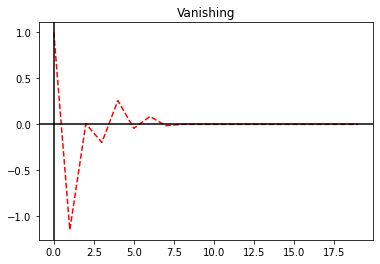

In [9]:
van_plot(20)

#### (1) Sigmoid Function 
- Sigmoid function의 경우  모든 $l$에 대해 $ \left |\frac{\partial z^{(l+1)}        }{\partial y^{(l)}     } \right | < 0.25$임
- 따라서 Depth가 깊어지면(Hidden layer)수가 많아지면 Backpropagation을 통해 $w_{i,j}^{(l)}$을 updata하기 위한 다음과 같은 gradient descent를 사용할 때

$$
w_{i,j}^{(l)} = w_{i,j}^{(l)} - \rho \left( \frac{\partial Loss(W)        }{\partial w_{i,j}^{(l)}     } \right)
$$

- Gradient Vanishing $ \left( \frac{\partial Loss(W)        }{\partial w_{i,j}^{(l)}     } \rightarrow 0 \right) $이 발생하여 $w_{i,j}^{(l)}$가 update되지 않음

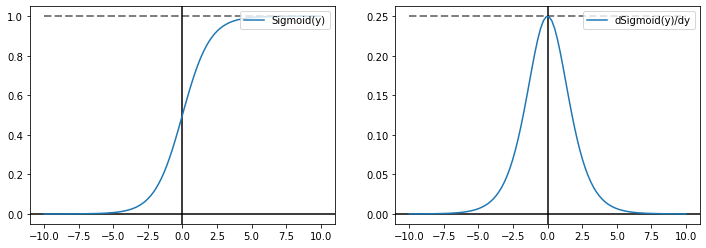

In [10]:
import numpy as np
import matplotlib.pyplot as plt

y_set = np.linspace(-10.0, 10.0, num=100)

def Sigmoid(y):
    return 1/(1 + np.exp(-y))

def dSigmoid(y):
    return Sigmoid(y)*(1-Sigmoid(y))
    
Sigmoid_y = np.array([Sigmoid(y) for y in y_set])
dSigmoid_y = np.array([dSigmoid(y) for y in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.axvline(x=0, color = 'k') # draw x =0 axes 
ax1.axhline(y=0, color = 'k') # draw y =0 axes
ax1.hlines( 1.0, -10.0, 10.0, color='gray', linestyle='--', linewidth=2)
ax1.plot(y_set, Sigmoid_y, label="Sigmoid(y)")
ax1.legend(loc='upper right')

ax2.axvline(x=0, color = 'k') # draw x =0 axes 
ax2.axhline(y=0, color = 'k') # draw y =0 axes
ax2.plot(y_set, dSigmoid_y, label="dSigmoid(y)/dy")
ax2.hlines( 0.25, -10.0, 10.0, color='gray', linestyle='--', linewidth=2)
ax2.legend(loc='upper right')

#### (2) ReLU Function 

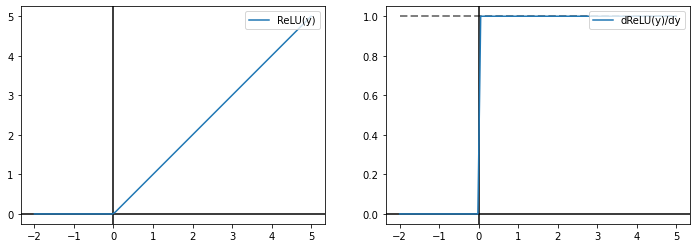

In [11]:
import numpy as np
import matplotlib.pyplot as plt

y_set = np.linspace(-2.0, 5.0, num=100)

def ReLU(x):
    if x > 0: 
        return x
    else: 
        return 0

def dReLU(x):
    if x > 0: 
        return 1
    else: 
        return 0
    
ReLU_y = np.array([ReLU(y) for y in y_set])
dReLU_y = np.array([dReLU(y) for y in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.axvline(x=0, color = 'k') # draw x =0 axes 
ax1.axhline(y=0, color = 'k') # draw y =0 axes
ax1.plot(y_set, ReLU_y, label="ReLU(y)")
ax1.legend(loc='upper right')

ax2.axvline(x=0, color = 'k') # draw x =0 axes 
ax2.axhline(y=0, color = 'k') # draw y =0 axes
ax2.hlines( 1.0, -2.0, 5.0, color='gray', linestyle='--', linewidth=2)

ax2.plot(y_set, dReLU_y, label="dReLU(y)/dy")
ax2.legend(loc='upper right')

#### (3) tanh Function 

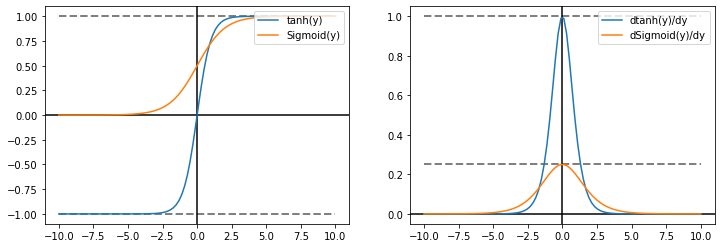

In [12]:
import numpy as np
import matplotlib.pyplot as plt

y_set = np.linspace(-10.0, 10.0, num=100)

def tanh(y):
    return (np.exp(y) - np.exp(-y))/(np.exp(y) + np.exp(-y))

def dtanh(y):
    return (1 - tanh(y)) * (1 + tanh(y))
    
tanh_y = np.array([tanh(y) for y in y_set])
dtanh_y = np.array([dtanh(y) for y in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.axvline(x=0, color = 'k') # draw x =0 axes 
ax1.axhline(y=0, color = 'k') # draw y =0 axes
ax1.hlines( 1.0, -10.0, 10.0, color='gray', linestyle='--', linewidth=2)
ax1.hlines(-1.0, -10.0, 10.0, color='gray', linestyle='--', linewidth=2)
ax1.plot(y_set, tanh_y, label="tanh(y)")
ax1.plot(y_set, Sigmoid_y, label="Sigmoid(y)")
ax1.legend(loc='upper right')

ax2.axvline(x=0, color = 'k') # draw x =0 axes 
ax2.axhline(y=0, color = 'k') # draw y =0 axes
ax2.hlines( 1.0, -10.0, 10.0, color='gray', linestyle='--', linewidth=2)
ax2.hlines( 0.25, -10.0, 10.0, color='gray', linestyle='--', linewidth=2)
ax2.plot(y_set, dtanh_y, label="dtanh(y)/dy")
ax2.plot(y_set, dSigmoid_y, label="dSigmoid(y)/dy")
ax2.legend(loc='upper right')

#### [생각해 보기] 

- Gradient Vanishing을 방지하기 위한 방법은 무엇이 있을까?<br>


- Activation Function에서 검토했던 Parametric Activation Function을 사용하면 Gradient Vanishing이 감소한다<br>
$ \ \ $ $\checkmark \ $ 그 이유를 설명할 수 있을까?

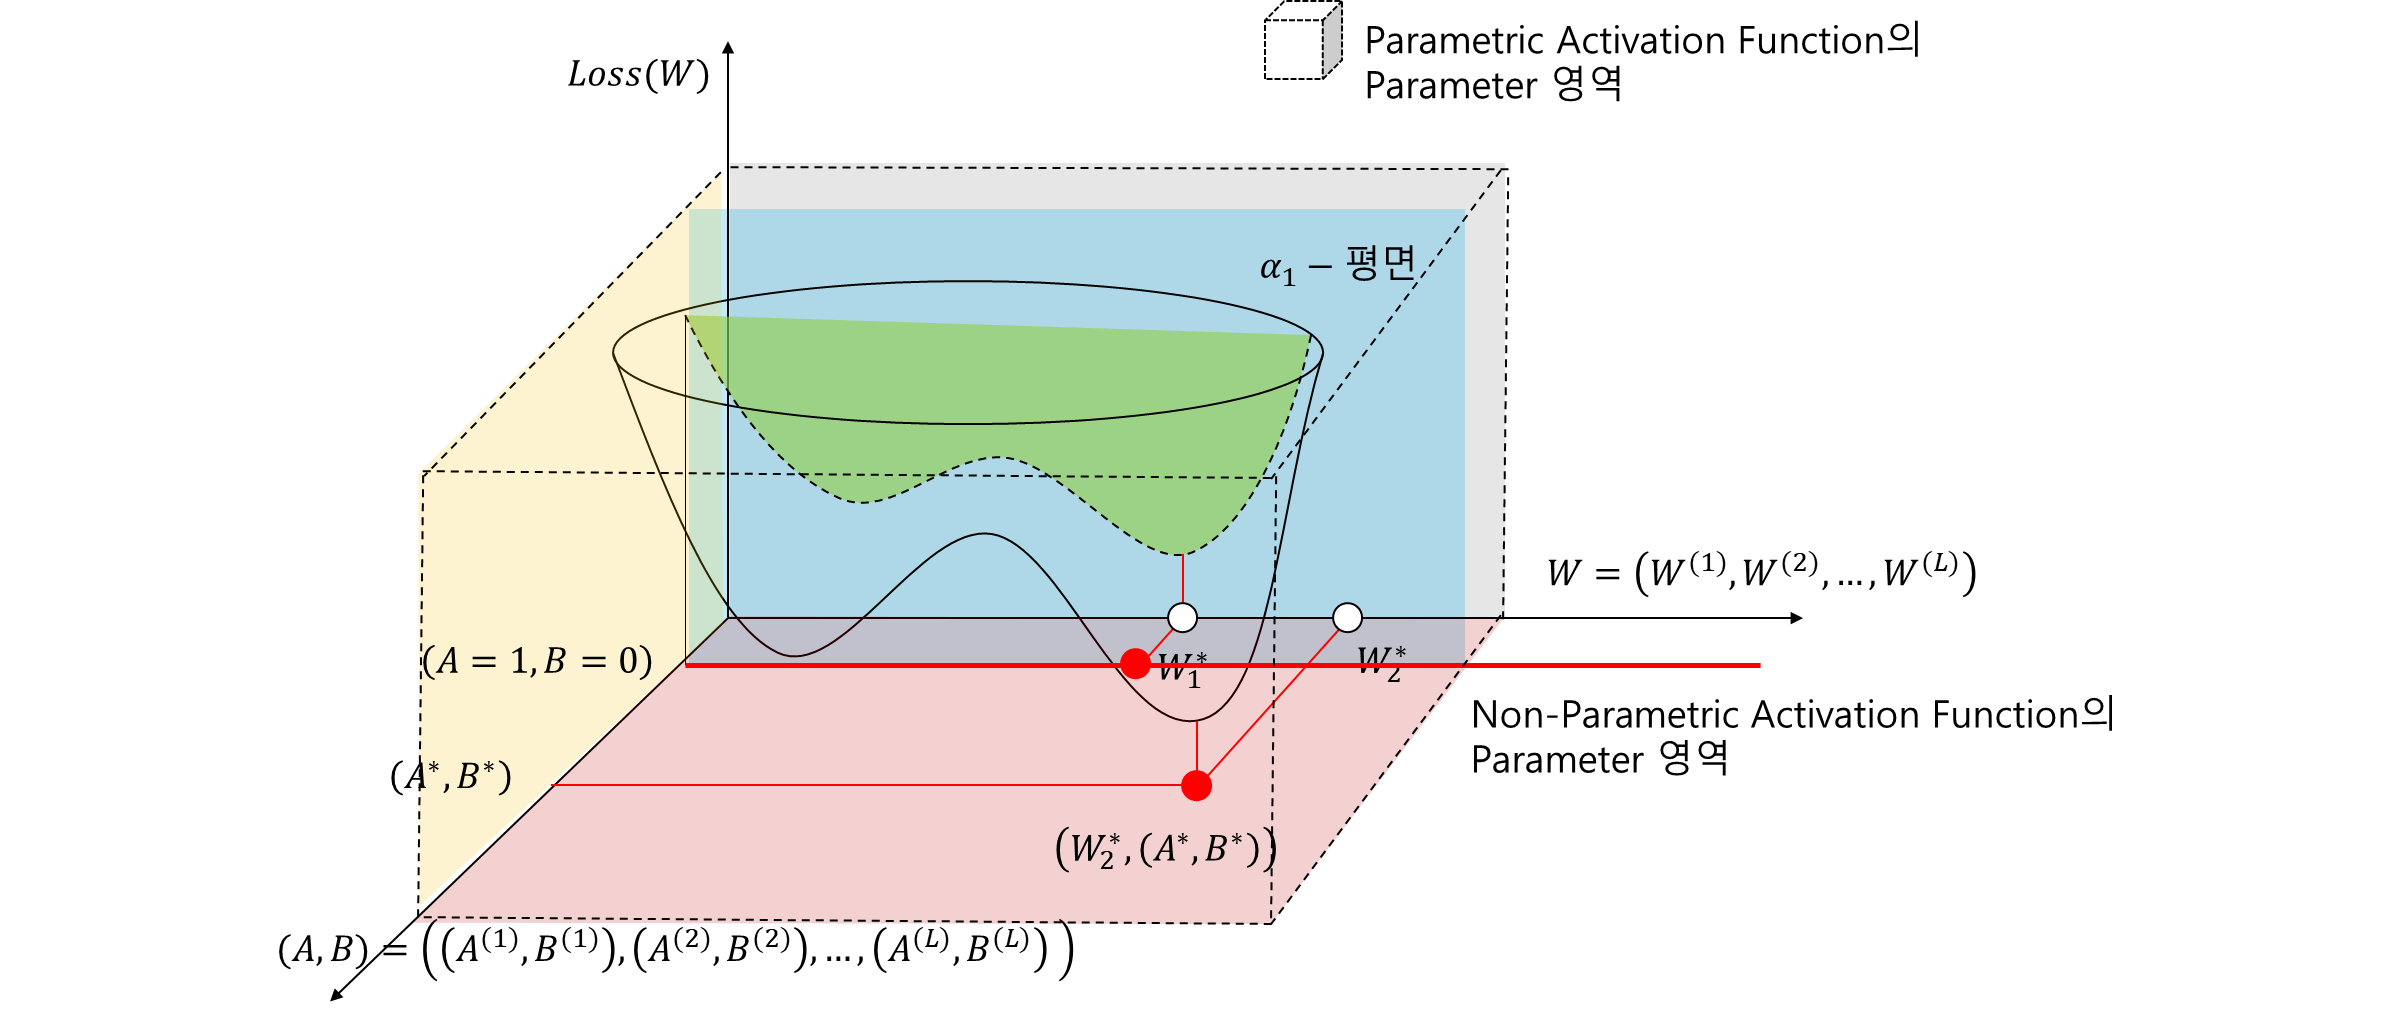

### [과제 1] 

- 다음과 같이 10개 hidden layer를 가지는 $XOR_{10}$ Network이 있다

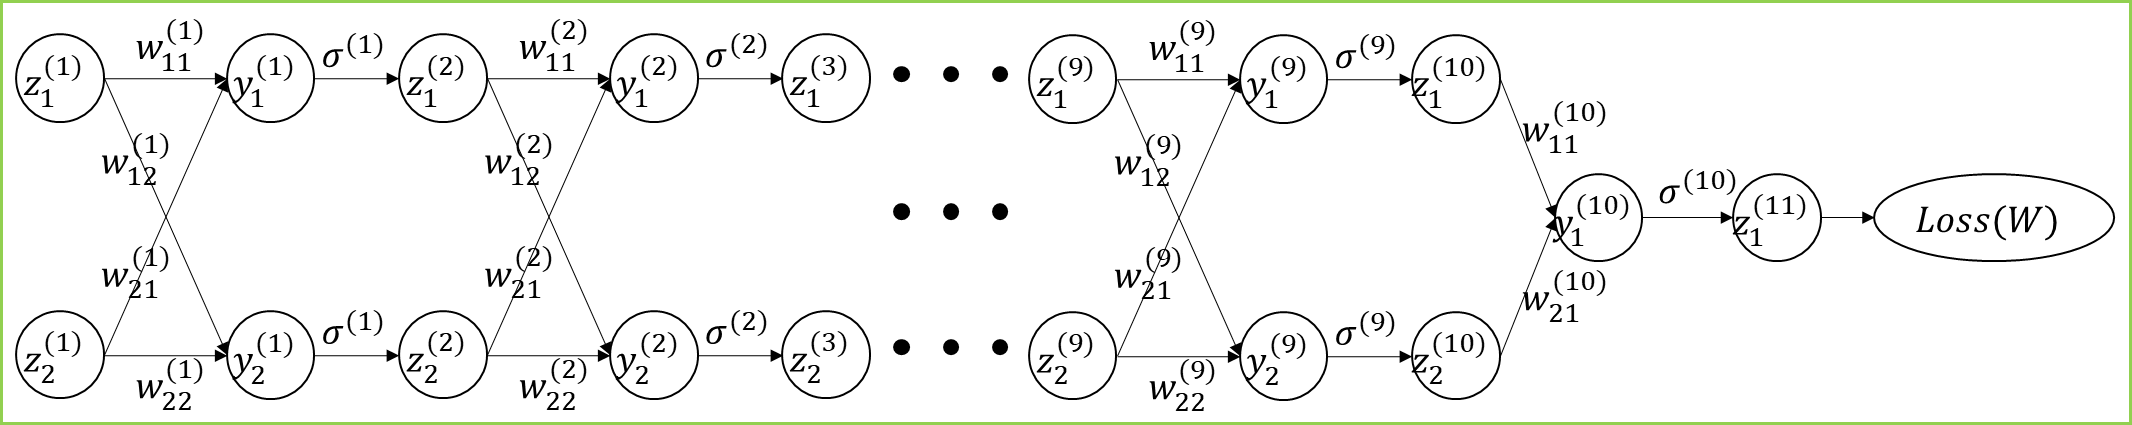

1. Activation function으로 ReLU, Sigmoid function을 사용했을 때, Deep Neural Network으로 문제를 푸시오
2. Gradient Vanishing이 나타나는 현상을 설명해 보시오 
3. Gradient Vanishing문제를 극복하기 위한 방법은 무엇일까?